<a href="https://colab.research.google.com/github/zahra370/DL_assignments/blob/main/KNNfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 6s 0us/step
Images Shape: (50000, 32, 32, 3)
Labels Shape: (50000, 1)
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
labels4 (5000, 1)
Index Shape: (50000,)
Filtered Images Shape: (5000, 32, 32, 3)
labels6 (5000, 1)


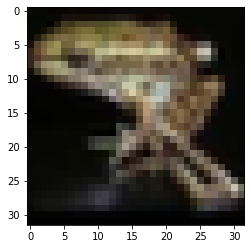

In [1]:
######## DEEP LEARNING ASSIGNMENT 01 ##########

from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

# importing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()

print('Images Shape: {}'.format(train_images.shape))
print('Labels Shape: {}'.format(train_labels.shape))

# extraction class 5 deer 
idx = (train_labels == 4).reshape(train_images.shape[0])
print('Index Shape: {}'.format(idx.shape))
filtered_images4 = train_images[idx]
print('Filtered Images Shape: {}'.format(filtered_images4.shape))
plt.imshow(filtered_images4[150])
# extracting labels for class4
labels_c4 = train_labels[idx]
print('labels4',labels_c4.shape)


# extracting class 6 frog

idx = (train_labels == 6).reshape(train_images.shape[0])
print('Index Shape: {}'.format(idx.shape))
filtered_images6 = train_images[idx]
print('Filtered Images Shape: {}'.format(filtered_images6.shape))
plt.imshow(filtered_images6[200])

# extracting labels for class6

labels_c6 = train_labels[idx]
print('labels6',labels_c6.shape)

In [2]:
# extracting first 20 images from class4

class4_img = filtered_images4[:20]
print(class4_img.shape)
class6_img = filtered_images6[:20]
print(class6_img.shape)
c4_labels = labels_c4[:20]
print(c4_labels.shape)
c6_labels = labels_c6[:20]
print(c6_labels.shape)

(20, 32, 32, 3)
(20, 32, 32, 3)
(20, 1)
(20, 1)


In [3]:
# splitting data into train and test set

X_train_c4 = class4_img[:16]
X_train2_c6 = class6_img[:16]
X_TRAIN = np.concatenate((X_train_c4, X_train2_c6))
print(X_TRAIN.shape)

X_test_c4 = class4_img[16:]
X_test_c6 = class6_img[16:]
X_TEST = np.concatenate((X_test_c4, X_test_c6))
print(X_TEST.shape)

Y_train_c4 = c4_labels[:16]
Y_train_c6 = c6_labels[:16]
Y_TRAIN = np.concatenate((Y_train_c4, Y_train_c6))
print(Y_TRAIN.shape)

Y_test_c4 = c4_labels[16:]
Y_test_c6 = c6_labels[16:]
Y_TEST = np.concatenate((Y_test_c4, Y_test_c6))
print(Y_TEST.shape)

(32, 32, 32, 3)
(8, 32, 32, 3)
(32, 1)
(8, 1)


In [4]:
# Building KNN MODEL

class KNN():

  # initializing the parameters
  def __init__(self, distance_metric):
    self.distance_metric = distance_metric
  
  # training function
  def train(self, X , Y):
    self.X_train = X
    self.y_train = Y

  # finding the distance 
  def get_distance_meteric(self, X ):
    if (self.distance_metric == 'euclidean'):
      num_test = X.shape[0]
      num_train = self.X_train.shape[0]
      dists = np.zeros((num_test, num_train))
      for i in range(num_test):
        for j in range(num_train):
          dists[i,j] = np.sqrt(np.sum(np.square(X[i,:] - self.X_train[j,:])))
        
      return dists
    
    elif (self.distance_metric == 'manhattan'):
      num_test = X.shape[0]
      num_train = self.X_train.shape[0]
      dists = np.zeros((num_test, num_train))
      dists = np.zeros((num_test, num_train))
      for i in range(num_test):
        for j in range(num_train):
          dists[i,j] = np.sum(np.abs(X[i,:] - self.X_train[j,:]))
      return dists
  
  # predit function

  def predict (self, dists, k):

    num_test  = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
      closest_y = []
      # getting the index of the distance in the sorted list 
      sort_dis = np.argsort(dists[i,:])
      # extracting only the first k element from the sorted list
      knn_sort_dis_in = sort_dis[0:k]
      # finding the label 
      closest_y = self.y_train[knn_sort_dis_in]
      # reshaping list into 1
      closest_y = np.reshape(closest_y, -1)
      # counting maximum no of occured classes
      y_pred[i] = np.argmax(np.bincount(closest_y))


    return y_pred

In [5]:
# calling class 
c = KNN(distance_metric = 'euclidean')
c.train(X_TRAIN, Y_TRAIN)
dists = c.get_distance_meteric(X_TEST)
y_prd = c.predict(dists , k = 5)
y_prd = np.reshape(y_prd, (y_prd.shape[0], -1))
n_t = 8
n_c = np.sum(y_prd == Y_TEST)
model_acc = float(n_c)/ n_t
print('Got %d / %d correct => accuracy: %f' % (n_c, n_t, model_acc))

Got 5 / 8 correct => accuracy: 0.625000


In [6]:
print(y_prd)
print(len(X_TEST))

[[6.]
 [4.]
 [4.]
 [4.]
 [6.]
 [4.]
 [4.]
 [6.]]
8


In [7]:
# creating five folds for cross validation
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]



X_train_folds = []
y_train_folds = []

# splitting training data into 5 no of folds
X_train_folds = np.array_split(X_TRAIN,num_folds)
y_train_folds = np.array_split(Y_TRAIN,num_folds)
k_to_accuracies = {}



for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNN(distance_metric = 'euclidean')
        classifier.train(X_train, y_train)
        dists = classifier.get_distance_meteric(X_test)
        y_test_pred = classifier.predict(dists, k)

        y_test_prd = np.reshape(y_test_pred, (y_test_pred.shape[0], -1))

        num_correct = np.sum(y_test_prd == y_test)
        num_test = 8
        accuracy = float(num_correct) / num_test
        k_to_accuracies[k].append(accuracy)


print("Printing our 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

Printing our 5-fold accuracies for varying values of k:

k = 1, accuracy = 0.250000
k = 1, accuracy = 0.500000
k = 1, accuracy = 0.000000
k = 1, accuracy = 0.375000
k = 1, accuracy = 0.500000
k = 3, accuracy = 0.250000
k = 3, accuracy = 0.375000
k = 3, accuracy = 0.125000
k = 3, accuracy = 0.375000
k = 3, accuracy = 0.250000
k = 5, accuracy = 0.125000
k = 5, accuracy = 0.125000
k = 5, accuracy = 0.000000
k = 5, accuracy = 0.375000
k = 5, accuracy = 0.250000
k = 8, accuracy = 0.250000
k = 8, accuracy = 0.125000
k = 8, accuracy = 0.250000
k = 8, accuracy = 0.000000
k = 8, accuracy = 0.000000
k = 10, accuracy = 0.125000
k = 10, accuracy = 0.125000
k = 10, accuracy = 0.250000
k = 10, accuracy = 0.000000
k = 10, accuracy = 0.000000
k = 12, accuracy = 0.125000
k = 12, accuracy = 0.125000
k = 12, accuracy = 0.125000
k = 12, accuracy = 0.000000
k = 12, accuracy = 0.000000
k = 15, accuracy = 0.000000
k = 15, accuracy = 0.000000
k = 15, accuracy = 0.125000
k = 15, accuracy = 0.000000
k = 15, acc

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


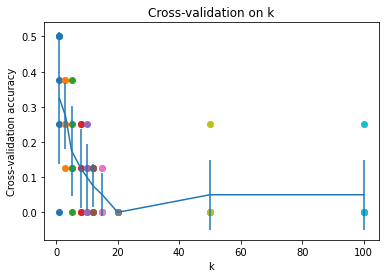

In [8]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [9]:
# Choosing best value of k based on cross-validation results

best_k = 1

classifier = KNN(distance_metric = 'euclidean')
classifier.train(X_TRAIN, Y_TRAIN)
y_test_pred = classifier.predict(X_TEST, k=best_k)
y_prd = np.reshape(y_test_pred, (y_test_pred.shape[0], -1))

# Computing and displaying the accuracy for best k found during cross-validation
num_correct = np.sum(y_prd == Y_TEST)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))



Got 4 / 8 correct => accuracy: 0.500000
